In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

def get_x_y_from_pandas(df, features_str, algo):
    X, Y = [], []
    xs = [[] for _ in range(len(features_str))]
    
    for i, f in enumerate(features_str):
        xs[i] = df[[f]].to_numpy().flatten()
    ys = df[[algo]].to_numpy().flatten()
    
    for i in range(len(xs[0])):
        X.append([x[i] for x in xs])
        Y.append(ys[i])
    return np.array(X), np.array(Y)

# DS = "ml-100k"
DS = "ml-1M"

MODEL_NAMES = ["UserKNN-Amplified", "UserKNN-BM25", "UserKNN-Cosine", "UserKNN-IDF",
               "ItemKNN-AdjustedCosine", "BPR", "MF", "SVD", "PMF", "NMF"]

METRICS = ["MAE", "RMSE", "AUC", "MAP", "NDCG@100", "Precision@100", "Recall@100"]

FEATURES = ["gini", "variation", "num_ratings", "rating_avg",
           "rating_std", "phi", "avg_phi", "entropy", "entropy_of_consumed_sum",
           "entropy_of_consumed_avg", "proportion_long_tailors"]

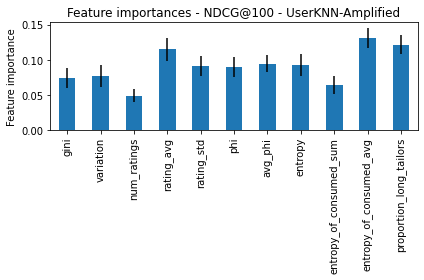

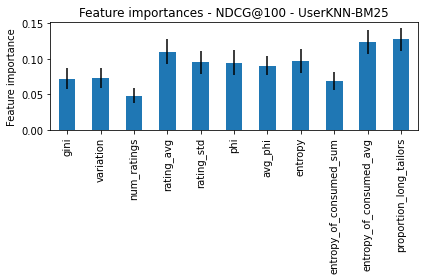

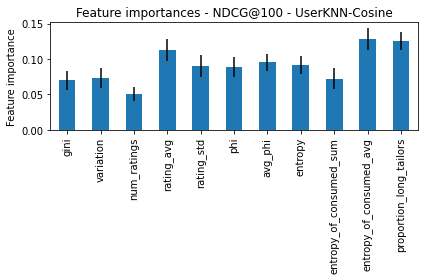

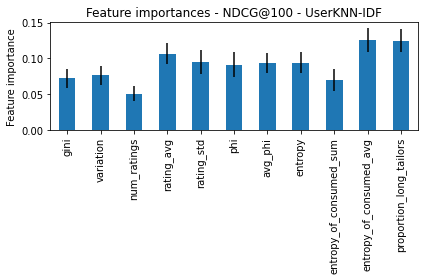

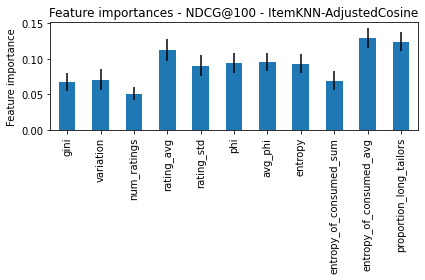

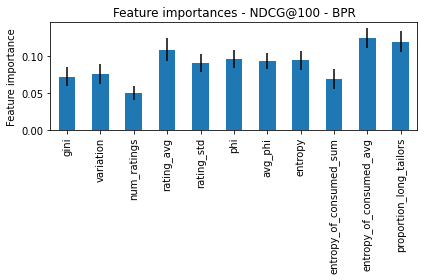

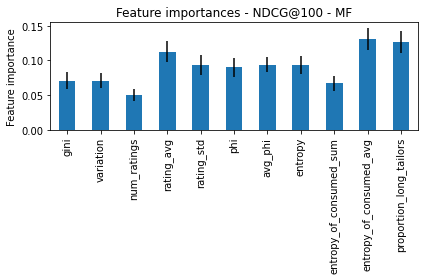

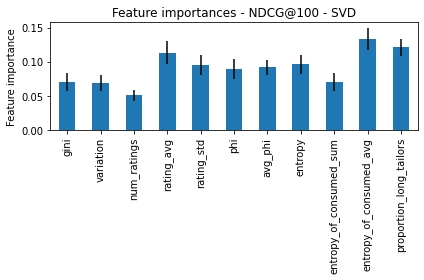

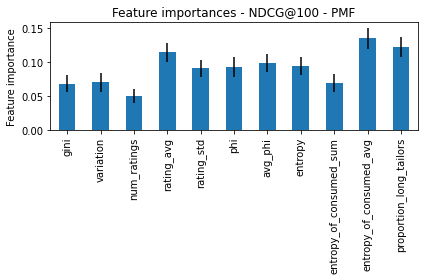

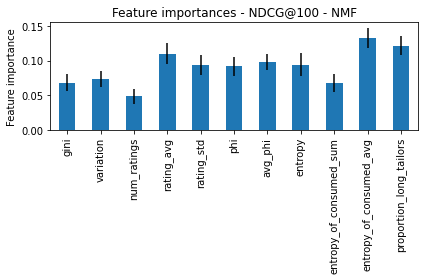

In [4]:
metric = "NDCG@100"
# algo = "NMF"

# for algo in MODEL_NAMES:
for algo in MODEL_NAMES:
    df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                              sep='\s*,\s*', index_col=0, engine='python')
    df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                            sep='\s*,\s*', index_col=0, engine='python')
    df = df_features.join(df_models)

    x, y = get_x_y_from_pandas(df, FEATURES, algo)
    forest = RandomForestRegressor()
    forest.fit(x,y)
    importances = forest.feature_importances_
    std = np.std([
        tree.feature_importances_ for tree in forest.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=FEATURES)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title(f"Feature importances - {metric} - {algo}")
    ax.set_ylabel("Feature importance")
    fig.tight_layout()

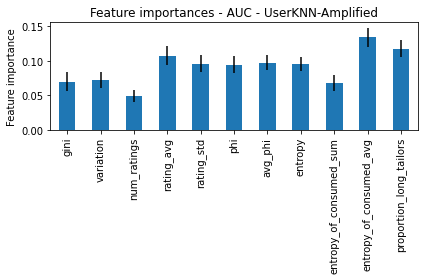

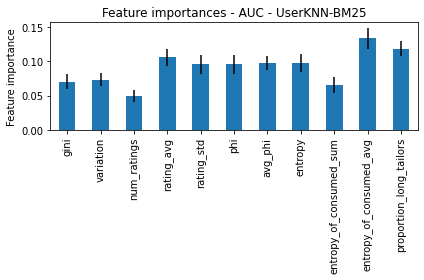

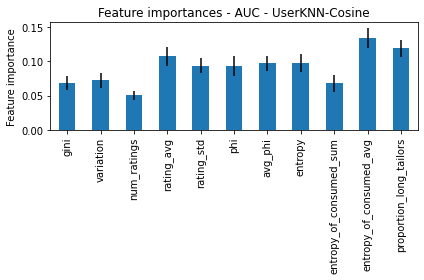

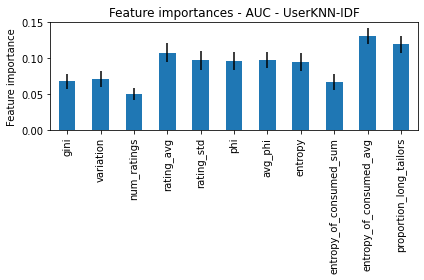

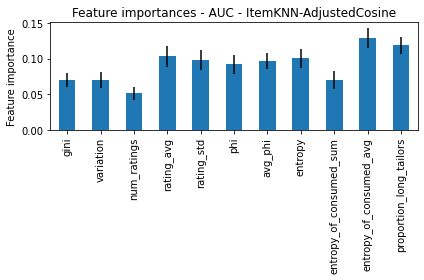

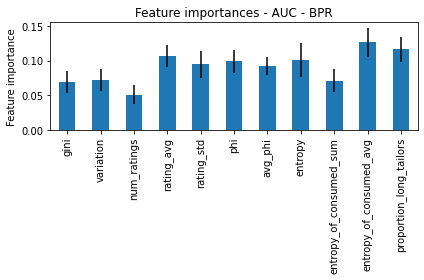

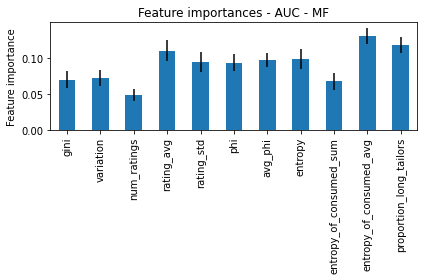

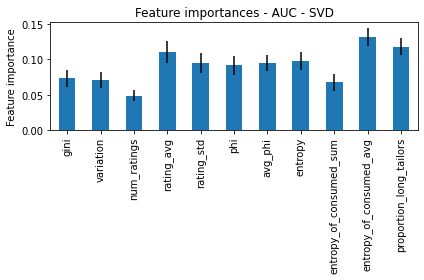

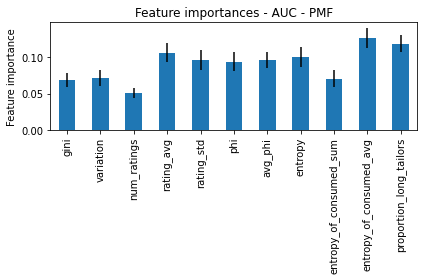

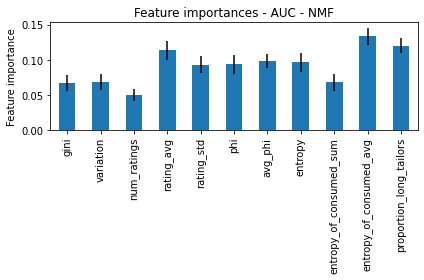

In [3]:
metric = "AUC"

# for algo in MODEL_NAMES:
for algo in MODEL_NAMES:
    df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                              sep='\s*,\s*', index_col=0, engine='python')
    df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                            sep='\s*,\s*', index_col=0, engine='python')
    df = df_features.join(df_models)

    x, y = get_x_y_from_pandas(df, FEATURES, algo)
    forest = RandomForestRegressor()
    forest.fit(x,y)
    importances = forest.feature_importances_
    std = np.std([
        tree.feature_importances_ for tree in forest.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=FEATURES)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title(f"Feature importances - {metric} - {algo}")
    ax.set_ylabel("Feature importance")
    fig.tight_layout()

NDCG@100@UserKNN-Amplified -> buckets size:[2498, 472, 596, 557, 441, 383, 257, 224, 158, 111, 97, 77, 40, 29, 30, 19, 12, 10, 11, 5, 1, 3, 1, 3, 0, 2, 1, 0, 0, 1, 1]
NDCG@100@UserKNN-Amplified -> forest_mean_acc: 0.397

NDCG@100@UserKNN-BM25 -> buckets size:[2208, 534, 664, 538, 474, 384, 292, 206, 175, 104, 87, 86, 56, 51, 38, 35, 23, 11, 19, 12, 16, 4, 3, 4, 3, 2, 2, 4, 1, 3, 1]
NDCG@100@UserKNN-BM25 -> forest_mean_acc: 0.355

NDCG@100@UserKNN-Cosine -> buckets size:[2657, 405, 585, 516, 424, 397, 250, 207, 145, 105, 82, 46, 59, 49, 28, 27, 17, 13, 9, 6, 3, 3, 1, 3, 1, 1, 0, 0, 0, 0, 1]
NDCG@100@UserKNN-Cosine -> forest_mean_acc: 0.43

NDCG@100@UserKNN-IDF -> buckets size:[2388, 593, 669, 536, 467, 351, 267, 165, 145, 103, 85, 68, 50, 35, 35, 21, 22, 12, 5, 6, 9, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1]
NDCG@100@UserKNN-IDF -> forest_mean_acc: 0.379

NDCG@100@ItemKNN-AdjustedCosine -> buckets size:[2208, 143, 362, 404, 430, 396, 328, 293, 283, 251, 206, 165, 125, 109, 97, 82, 46, 27, 23, 22, 1

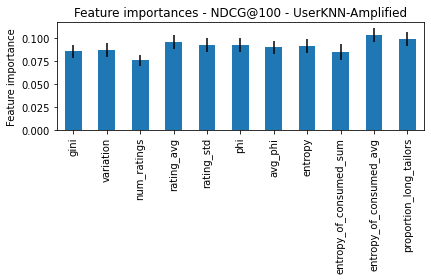

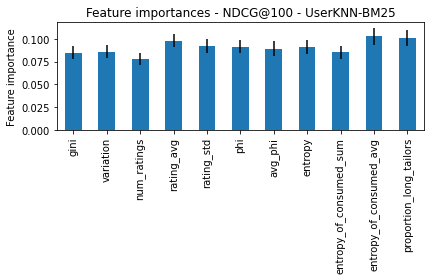

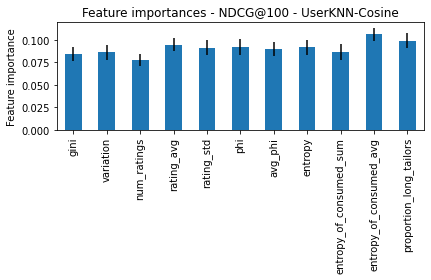

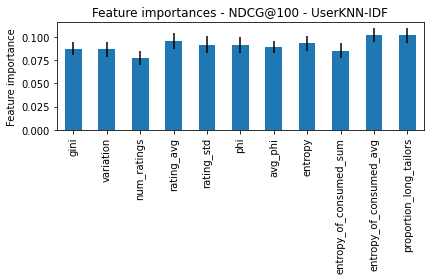

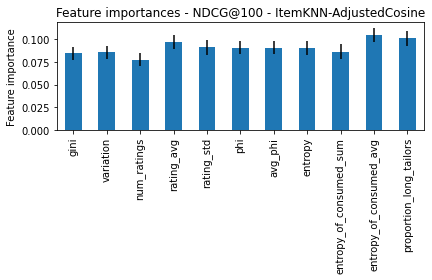

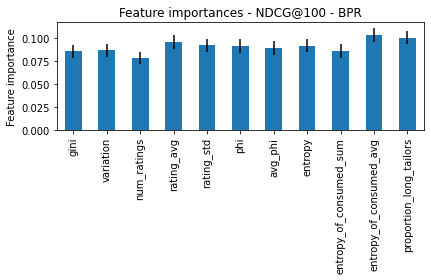

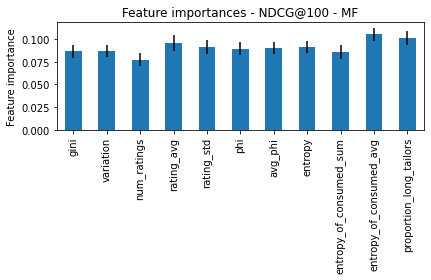

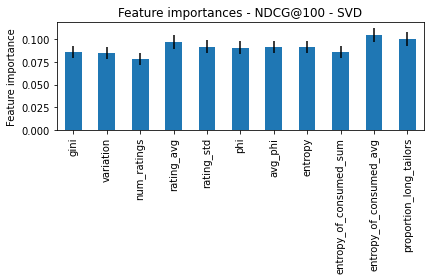

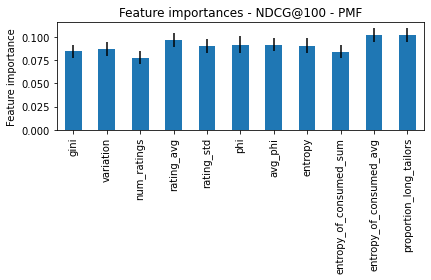

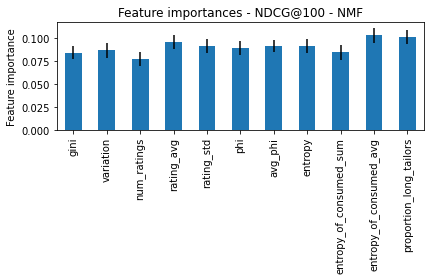

In [20]:
from sklearn.model_selection import train_test_split

def divide_Y_into_groups(Y, num_groups):
    max_y, min_y = max(Y), min(Y)
    bucket_size = (max_y-min_y)/num_groups
    y_buckets = [[] for _ in range(num_groups+1)]
    res = []
    for i in Y:
        idx = int((i-min_y)//bucket_size)
        y_buckets[idx].append(i)
        res.append(idx)
    return res, y_buckets

metric = "NDCG@100"
# algo = "NMF"

# for algo in MODEL_NAMES:
for algo in MODEL_NAMES:
    df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                              sep='\s*,\s*', index_col=0, engine='python')
    df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                            sep='\s*,\s*', index_col=0, engine='python')
    df = df_features.join(df_models)

    x, y = get_x_y_from_pandas(df, FEATURES, algo)
    y, y_buckets = divide_Y_into_groups(y, 30)
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=123)  
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    mean_acc = forest.score(X_test, y_test)
    
    # print metrics
    print(f'{metric}@{algo} -> buckets size:{[len(a) for a in y_buckets]}')
    print(f'{metric}@{algo} -> forest_mean_acc: {round(mean_acc, 3)}')
    print()
    
    # plot importances
    importances = forest.feature_importances_
    std = np.std([
        tree.feature_importances_ for tree in forest.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=FEATURES)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title(f"Feature importances - {metric} - {algo}")
    ax.set_ylabel("Feature importance")
    fig.tight_layout()

In [21]:
metric = "MAE"
# algo = "NMF"

# for algo in MODEL_NAMES:
for algo in MODEL_NAMES:
    df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                              sep='\s*,\s*', index_col=0, engine='python')
    df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                            sep='\s*,\s*', index_col=0, engine='python')
    df = df_features.join(df_models)

    x, y = get_x_y_from_pandas(df, FEATURES, algo)
    y, y_buckets = divide_Y_into_groups(y, 30)
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=123)  
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    mean_acc = forest.score(X_test, y_test)
    
    # print metrics
    print(f'{metric}@{algo} -> buckets size:{[len(a) for a in y_buckets]}')
    print(f'{metric}@{algo} -> forest_mean_acc: {round(mean_acc, 3)}')
    print()

MAE@UserKNN-Amplified -> buckets size:[6, 19, 63, 163, 480, 937, 1290, 1125, 786, 481, 308, 172, 70, 53, 38, 17, 12, 6, 4, 2, 1, 3, 0, 1, 1, 1, 0, 0, 0, 1, 0]
MAE@UserKNN-Amplified -> forest_mean_acc: 0.188

MAE@UserKNN-BM25 -> buckets size:[11, 37, 54, 227, 649, 1145, 1277, 1049, 654, 387, 255, 125, 70, 30, 31, 11, 8, 7, 2, 4, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0]
MAE@UserKNN-BM25 -> forest_mean_acc: 0.206

MAE@UserKNN-Cosine -> buckets size:[5, 26, 71, 202, 613, 1122, 1285, 1063, 687, 395, 260, 126, 78, 36, 33, 14, 7, 5, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]
MAE@UserKNN-Cosine -> forest_mean_acc: 0.193

MAE@UserKNN-IDF -> buckets size:[7, 35, 86, 262, 753, 1230, 1316, 982, 576, 345, 219, 93, 53, 33, 22, 10, 4, 3, 4, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0]
MAE@UserKNN-IDF -> forest_mean_acc: 0.199

MAE@ItemKNN-AdjustedCosine -> buckets size:[13, 14, 43, 140, 464, 955, 1300, 1138, 767, 487, 287, 172, 109, 57, 37, 20, 12, 8, 9, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0]
MAE@ItemKNN-AdjustedCosine -> f

In [ ]:
# Forest acc



## New Test - Tentativa de Correlacionar "Confiança" com métricas de Acurácia

#### "Confiança"

ML Problem (?) -->

X: [Features do usuário]
y: Acurácia do usuário

acc, R2, ..., (?)

In [5]:
import sklearn

# for metric in METRICS:
metric = 'NDCG@100'
score_key = 'r2'

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                        sep='\s*,\s*', index_col=0, engine='python')
df = df_features.join(df_models)

## SVM
X, y = get_x_y_from_pandas(df, FEATURES, algo)
reg = svm.SVR(C=1., epsilon=0.1, kernel='rbf')
scores = cross_val_score(reg, X, y, cv=10, scoring=score_key)
print("SVM")
print(f'scores: {scores}')
print(f"%0.2f {score_key} with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("")

# Decision Tree 

SVM
scores: [-4.30080463 -4.50404632 -3.26425408 -3.31614908 -3.84345078 -4.37537957
 -3.08983756 -3.65355665 -2.86958405 -2.81240918]
-3.60 r2 with a standard deviation of 0.60



In [6]:
import scipy

def plt_chart(x, y, title, x_label, y_label):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

def get_corr(x, y):
    # (correlation, p-value)
    pearson = scipy.stats.pearsonr(x, y)
    # SpearmanrResult(correlation, pvalue)
    spearman = scipy.stats.spearmanr(x, y)
    # KendalltauResult(correlation, pvalue)
    kendall = scipy.stats.kendalltau(x, y)
    print(f'Pearson:\n\tcorr: {round(pearson[0], 3)}\n\tp-value: {round(pearson[0], 3)}\n')
    print(f'Spearman:\n\tcorr: {round(spearman.correlation, 3)}\n\tp-value: {round(spearman.pvalue, 3)}\n')
    print(f'Kendall:\n\tcorr: {round(kendall.correlation, 3)}\n\tp-value: {round(kendall.pvalue, 3)}\n')

Pearson:
	corr: -0.014
	p-value: -0.014

Spearman:
	corr: -0.005
	p-value: 0.774

Kendall:
	corr: -0.003
	p-value: 0.767



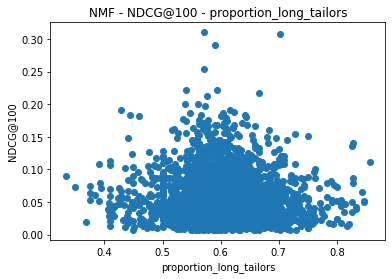

In [15]:
algo = "NMF"
metric = "NDCG@100"
feature = "proportion_long_tailors"

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                        sep='\s*,\s*', index_col=0, engine='python')
df = df_features.join(df_models)

x_, y_ = get_x_y_from_pandas(df, [feature], algo)
x, y = [], []
for i in range(len(x_)):
    if y_[i] != 0:
        x.append(x_[i][0])
        y.append(y_[i])

plt_chart(x, y, f"{algo} - {metric} - {feature}", feature, metric)
get_corr(x, y)

Pearson:
	corr: 0.017
	p-value: 0.017

Spearman:
	corr: 0.012
	p-value: 0.477

Kendall:
	corr: 0.007
	p-value: 0.489



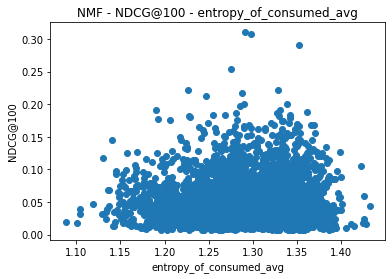

In [19]:
algo = "NMF"
metric = "NDCG@100"
feature = "entropy_of_consumed_avg"

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                        sep='\s*,\s*', index_col=0, engine='python')
df = df_features.join(df_models)

x_, y_ = get_x_y_from_pandas(df, [feature], algo)
x, y = [], []
for i in range(len(x_)):
    if y_[i] != 0:
        x.append(x_[i][0])
        y.append(y_[i])

plt_chart(x, y, f"{algo} - {metric} - {feature}", feature, metric)
get_corr(x, y)

Pearson:
	corr: -0.025
	p-value: -0.025

Spearman:
	corr: -0.027
	p-value: 0.091

Kendall:
	corr: -0.018
	p-value: 0.091



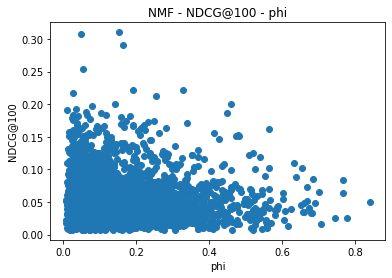

In [21]:
algo = "NMF"
metric = "NDCG@100"
feature = "phi"

# phi_i = non_zero da coluna / num users.

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                        sep='\s*,\s*', index_col=0, engine='python')
df = df_features.join(df_models)

x_, y_ = get_x_y_from_pandas(df, [feature], algo)
x, y = [], []
for i in range(len(x_)):
    if y_[i] != 0:
        x.append(x_[i][0])
        y.append(y_[i])

plt_chart(x, y, f"{algo} - {metric} - {feature}", feature, metric)
get_corr(x, y)

Pearson:
	corr: -0.003
	p-value: -0.003

Spearman:
	corr: 0.01
	p-value: 0.521

Kendall:
	corr: 0.007
	p-value: 0.513



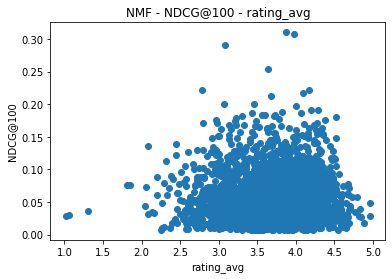

In [20]:
algo = "NMF"
metric = "NDCG@100"
feature = "rating_avg"

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                        sep='\s*,\s*', index_col=0, engine='python')
df = df_features.join(df_models)

x_, y_ = get_x_y_from_pandas(df, [feature], algo)
x, y = [], []
for i in range(len(x_)):
    if y_[i] != 0:
        x.append(x_[i][0])
        y.append(y_[i])

plt_chart(x, y, f"{algo} - {metric} - {feature}", feature, metric)
get_corr(x, y)

Pearson:
	corr: 0.015
	p-value: 0.015

Spearman:
	corr: 0.003
	p-value: 0.874

Kendall:
	corr: 0.002
	p-value: 0.885



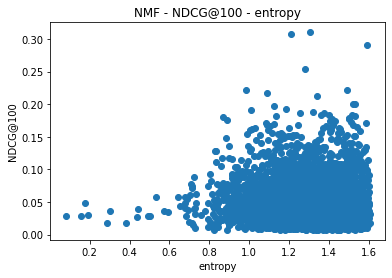

In [22]:
algo = "NMF"
metric = "NDCG@100"
feature = "entropy"

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                        sep='\s*,\s*', index_col=0, engine='python')
df = df_features.join(df_models)

x_, y_ = get_x_y_from_pandas(df, [feature], algo)
x, y = [], []
for i in range(len(x_)):
    if y_[i] != 0:
        x.append(x_[i][0])
        y.append(y_[i])

plt_chart(x, y, f"{algo} - {metric} - {feature}", feature, metric)
get_corr(x, y)